# Análisis de una solución de la ecuación del calor

La solución de la ecuación
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$
sujeta a las condiciones de frontera:
$$u(0,t)=u(1,t)=0, \;\;\; t>0$$
Y la condición inicial:
$$u(x,0)=x,\;\;\;0<x<1$$
Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,t)=\frac{2}{\pi}\sum_{n=1}^{\infty} \frac{(-1)^{n+1}}{n}  \sin(n\pi x)e^{-(n\pi)^2 t}.$$

Este problema modela la transferencia de calor en una barra ideal delgada, con $k=1$.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

Para empezar, graficamos la condición inicial.

In [18]:
def f_x(x):
    return x**2-2*x+3

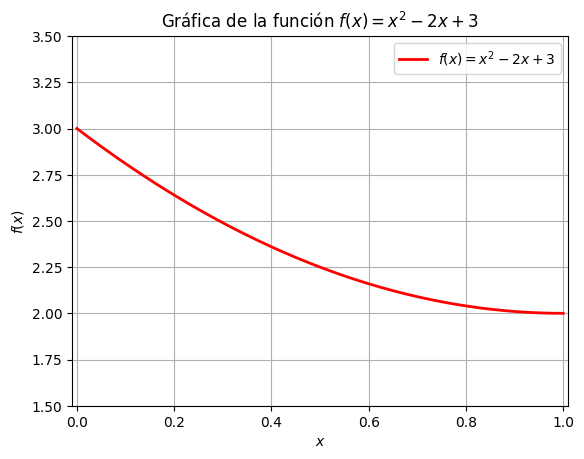

In [19]:
x = np.linspace(0,1,1000)
f = f_x(x)
plt.plot(x, f, label='$f(x) = x^2 - 2x + 3$', color='red', linewidth=2)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

# Título de la gráfica
plt.title("Gráfica de la función $f(x) = x^2 - 2x + 3$")

# Configuración de los ejes y leyenda
plt.xlim([-0.01,1.01])
plt.ylim([min(f) - 0.5, max(f) + 0.5])  # Ajuste dinámico del eje Y
plt.grid()
plt.legend()

# Mostrar la gráfica
plt.show()  # Asegurar que se llame plt.show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=f(x)=x$.

In [30]:
def fourier_series(x, N=50):
    sum_cos = np.zeros_like(x)
    sum_sin = np.zeros_like(x)

    for n in range(1, N+1):
        sum_cos += ((-1)**n / n**2) * np.cos(n * np.pi * x)
        sum_sin += ((-1)**n / n) * np.sin(n * np.pi * x)
    return (10/3) + (4/np.pi**2) * sum_cos + (4/np.pi) * sum_sin

# Definir valores de x en [-1,1]
x = np.linspace(-1, 1, 1000)

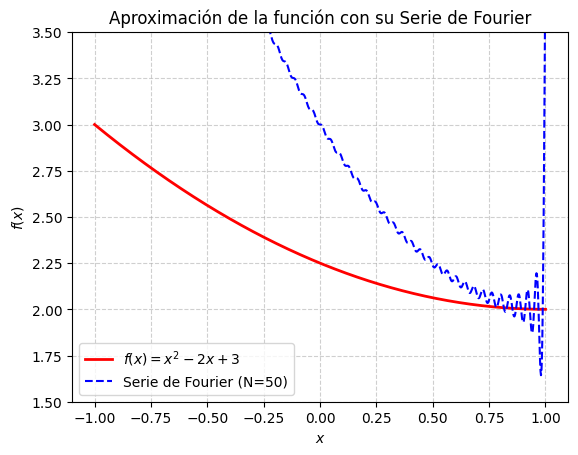

In [31]:
f_fourier = fourier_series(x, N=50)  # Ajusta N para mayor precisión

# Graficar la función original
plt.plot(x, f, label='$f(x) = x^2 - 2x + 3$', color='red', linewidth=2)

# Graficar la serie de Fourier
plt.plot(x, f_fourier, label='Serie de Fourier (N=50)', color='blue', linestyle='--')

# Etiquetas de los ejes y título
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Aproximación de la función con su Serie de Fourier")

# Configuración de los ejes y leyenda
plt.xlim([-1.1, 1.1])
plt.ylim([min(f) - 0.5, max(f) + 0.5])  # Ajuste dinámico del eje Y
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Mostrar la gráfica
plt.show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

In [ ]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [ ]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += (-1)**(n+1)*sin(n*pi*x)/(n)*exp(-n**2*pi**2*t[i])
    return (2.0/pi)*f

In [ ]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

In [ ]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

In [ ]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$');
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$');
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno"); #Otros colores:"viridis", "inferno", "plasma"